<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/005_%E5%A4%A9%E7%8C%AB%E4%BC%98%E6%83%A0%E5%8A%B5%E7%94%A8%E6%88%B7%E4%BD%BF%E7%94%A8%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 案例背景
“天猫”（英文Tmall,亦称淘宝商城、天猫商城）原名淘宝商城，是一个综合性购物网站， 是淘宝网全新打造的B2C(Business-to-Consumer,商业零售）品牌。其整合数千家品牌商、生产商，为商家和消费者之间提供一站式解决方案，提供100%品质保证的商品，7天无理由退货的售后服务，以及购物积分返现等优质服务。

天猫吸引大家去购买的一个手段就是优惠券。特别是像在“双十一”这种大促时间段，优惠券会起到非常大的促销作用。那么，我们本周预测的一个目标就是用户是否会使用优惠券 。

基于所给数据，利用Python逻辑回归分析方法，对顾客是否使用优惠券进行预测。

# 数据字典

*	ID	记录编码
*	age	年龄
*	job	职业
*	marital	婚姻状态
*	default	花呗是否有违约
*	returned	是否有过退货
*	loan	是否使用花呗结账
*	coupon_used_in_last6_month	过去六个月使用的优惠券数量
*	coupon_used_in_last_month	过去一个月使用的优惠券数量
*	coupon_ind	该次活动中是否有使用优惠券


# 1. 数据处理

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
tm = pd.read_csv('/content/L2_Week3.csv',index_col=0)
tm.head()

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
ID,,,,,,,,,
1,43,management,married,no,yes,no,2,0,0
2,42,technician,divorced,no,yes,no,1,1,0
3,47,admin.,married,no,yes,yes,2,0,0
4,28,management,single,no,yes,yes,2,0,0
5,42,technician,divorced,no,yes,no,5,0,0


In [ ]:
tm['job'].value_counts()

blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64

In [ ]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25317 entries, 1 to 25317
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         25317 non-null  int64 
 1   job                         25317 non-null  object
 2   marital                     25317 non-null  object
 3   default                     25317 non-null  object
 4   returned                    25317 non-null  object
 5   loan                        25317 non-null  object
 6   coupon_used_in_last6_month  25317 non-null  int64 
 7   coupon_used_in_last_month   25317 non-null  int64 
 8   coupon_ind                  25317 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.9+ MB


In [ ]:
tm.describe()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000
mean,40.935379,2.772050,0.292847,0.116957
std,10.634289,3.136097,0.765498,0.321375
min,18.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,0.000000
75%,48.000000,3.000000,0.000000,0.000000
max,95.000000,55.000000,15.000000,1.000000


In [ ]:
tm1 = pd.get_dummies(tm)
tm1.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,returned_no,returned_yes,loan_no,loan_yes
ID,,,,,,,,,,,,,,,,,,,,,
1,43,2,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
2,42,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3,47,2,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,28,2,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
5,42,5,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [ ]:
print(tm1.columns)

Index(['age', 'coupon_used_in_last6_month', 'coupon_used_in_last_month',
       'coupon_ind', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'returned_no', 'returned_yes', 'loan_no',
       'loan_yes'],
      dtype='object')


In [ ]:
tm1.drop(['job_unknown', 'default_no','returned_no','loan_no'],axis=1,inplace=True)

In [ ]:
tm1=tm1.rename(columns={'coupon_ind':'flag','default_yes':'default','returned_yes':'return','loan_yes':'loan'})
tm1.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default,return,loan
ID,,,,,,,,,,,,,,,,,,,,,
1,43,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,42,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,47,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,28,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
5,42,5,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


# 2. 关键变量的选择

In [ ]:
tm1['flag'].value_counts()

0    22356
1     2961
Name: flag, dtype: int64

In [ ]:
tm1['flag'].value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

## 2.1 age字段和目标变量的关系

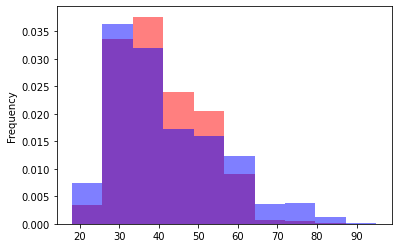

In [ ]:
tm1[tm1['flag']==0]['age'].plot(kind='hist',density='True',color='red',alpha=0.5)
tm1[tm1['flag']==1]['age'].plot(kind='hist',density='True',color='blue',alpha=0.5)

35岁以下以及60岁以上的用户更倾向使用优惠券，35岁-60岁倾向不使用优惠券


## 2.2 job和目标变量的关系



In [ ]:
tm['job'].value_counts(1)

blue-collar      0.215507
management       0.209188
technician       0.167516
admin.           0.114903
services         0.092507
retired          0.050282
self-employed    0.034917
entrepreneur     0.033811
unemployed       0.027689
housemaid        0.026188
student          0.021053
unknown          0.006438
Name: job, dtype: float64

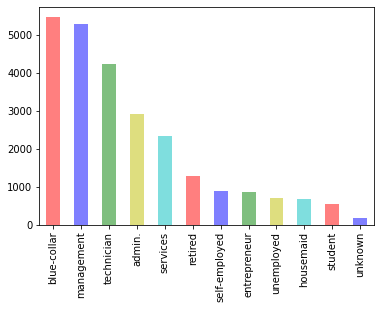

In [ ]:
tm['job'].value_counts().plot(kind='bar',color=['r','b','g','y','c'],alpha=0.5)

In [ ]:
tm.groupby('job')['coupon_ind'].value_counts(1)

job            coupon_ind
admin.         0             0.882778
               1             0.117222
blue-collar    0             0.929069
               1             0.070931
entrepreneur   0             0.921729
               1             0.078271
housemaid      0             0.912519
               1             0.087481
management     0             0.861027
               1             0.138973
retired        0             0.765907
               1             0.234093
self-employed  0             0.881222
               1             0.118778
services       0             0.909906
               1             0.090094
student        0             0.731707
               1             0.268293
technician     0             0.886583
               1             0.113417
unemployed     0             0.837375
               1             0.162625
unknown        0             0.877301
               1             0.122699
Name: coupon_ind, dtype: float64

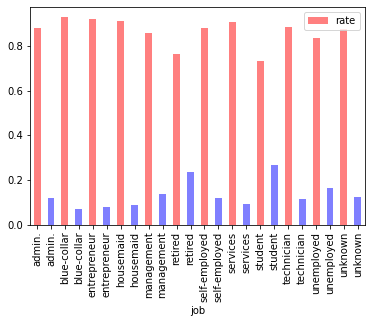

In [ ]:
tm2=pd.DataFrame(tm.groupby('job')['coupon_ind'].value_counts(1))
tm2=tm2.rename(columns={'coupon_ind':'rate'})
tm2=tm2.reset_index()
tm2.plot(kind='bar',x='job',y='rate',color=['r','b'],alpha=0.5)

职位为已退休、学生优惠券的使用比例相对其他职业是最高,跟年龄分析的结论是相同的

## 2.3 marital变量与目标变量分析

In [ ]:
tm['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [ ]:
tm.groupby('marital')['coupon_ind'].value_counts(1)

marital   coupon_ind
divorced  0             0.880617
          1             0.119383
married   0             0.897343
          1             0.102657
single    0             0.853570
          1             0.146430
Name: coupon_ind, dtype: float64

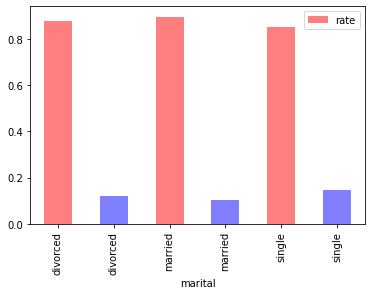

In [ ]:
tm3=pd.DataFrame(tm.groupby('marital')['coupon_ind'].value_counts(1))
tm3=tm3.rename(columns={'coupon_ind':'rate'})
tm3=tm3.reset_index()
tm3.plot(kind='bar',x='marital',y='rate',color=['r','b'],alpha=0.5)

在不同婚姻状态下，使用优惠券的比例相差不大，单身人群较高

## 2.4 default（花呗是否违约）变量分析


In [ ]:
tm.groupby('default')['coupon_ind'].value_counts(1)

default  coupon_ind
no       0             0.881982
         1             0.118018
yes      0             0.941964
         1             0.058036
Name: coupon_ind, dtype: float64

花呗没有违约的人群中使用优惠券的比例较高，比‘违约’的使用比例高出一倍

## 2.5 returned（是否有过退货）变量分析

In [ ]:
tm.groupby('returned')['coupon_ind'].value_counts(1)

returned  coupon_ind
no        0             0.831637
          1             0.168363
yes       0             0.924465
          1             0.075535
Name: coupon_ind, dtype: float64

没有退货记录的人群使用优惠券的概率比有过退货记录的人高出两倍左右

## 2.6 loan（是否使用过花呗）变量分析



In [ ]:
tm.groupby('loan')['coupon_ind'].value_counts(1)

loan  coupon_ind
no    0             0.873883
      1             0.126117
yes   0             0.931017
      1             0.068983
Name: coupon_ind, dtype: float64

没有使用过花呗的人群使用优惠券的比例是使用过的人群的两倍左右

## 2.7 coupon_used_in_last6_month单变量分析

In [ ]:
tm['coupon_used_in_last6_month'].unique()

array([ 2,  1,  5,  4,  3,  8,  9, 10,  6,  7, 12, 11, 16, 33, 17, 19, 14,
       23, 13, 15, 34, 27, 18, 36, 21, 41, 31, 28, 24, 22, 29, 26, 32, 30,
       20, 25, 50, 37, 55, 44, 43, 35, 51])

In [ ]:
bins = [0,2,4,6,8,10,15,20,30,60]
tm['coupon_used_6_level'] = pd.cut(tm['coupon_used_in_last6_month'],bins,right=False)
tm.groupby('coupon_used_6_level').coupon_used_in_last6_month.describe()

,count,mean,std,min,25%,50%,75%,max
coupon_used_6_level,,,,,,,,
"[0, 2)",9825.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
"[2, 4)",10107.0,2.306520,0.461071,2.0,2.0,2.0,3.0,3.0
"[4, 6)",2946.0,4.335709,0.472318,4.0,4.0,4.0,5.0,5.0
"[6, 8)",1129.0,6.359610,0.480099,6.0,6.0,6.0,7.0,7.0
"[8, 10)",485.0,8.377320,0.485216,8.0,8.0,8.0,9.0,9.0
"[10, 15)",455.0,11.452747,1.357581,10.0,10.0,11.0,12.0,14.0
"[15, 20)",201.0,16.711443,1.313894,15.0,16.0,17.0,18.0,19.0
"[20, 30)",129.0,23.542636,2.950126,20.0,21.0,23.0,26.0,29.0
"[30, 60)",40.0,35.500000,6.516252,30.0,31.0,33.0,36.0,55.0


In [ ]:
tm.groupby('coupon_used_6_level')['coupon_ind'].value_counts(1)

coupon_used_6_level  coupon_ind
[0, 2)               0             0.853232
                     1             0.146768
[2, 4)               0             0.888790
                     1             0.111210
[4, 6)               0             0.912424
                     1             0.087576
[6, 8)               0             0.931798
                     1             0.068202
[8, 10)              0             0.938144
                     1             0.061856
[10, 15)             0             0.958242
                     1             0.041758
[15, 20)             0             0.960199
                     1             0.039801
[20, 30)             0             0.976744
                     1             0.023256
[30, 60)             0             1.000000
Name: coupon_ind, dtype: float64

过去六个月使用优惠券次数在1-4次的用户更倾向于使用优惠券

# 3. 模型建立

In [ ]:
summary = tm1.groupby('flag')
summary.mean()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default,return,loan
flag,,,,,,,,,,,,,,,,,,,,
0,40.819601,2.857846,0.260378,0.114868,0.226740,0.035293,0.027062,0.203972,0.043612,0.034845,0.095321,0.017445,0.168188,0.026257,0.114824,0.611916,0.273260,0.018876,0.579755,0.169037
1,41.809524,2.124282,0.537994,0.115164,0.130699,0.022627,0.019588,0.248565,0.100642,0.035461,0.071260,0.048294,0.162445,0.038501,0.117528,0.528538,0.353934,0.008781,0.357649,0.094563


In [ ]:
tm1.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
coupon_used_in_last_month,0.116550
job_retired,0.083868
job_student,0.069058
marital_single,0.057574
job_management,0.035234
age,0.029916
job_unemployed,0.023980
marital_divorced,0.002723
job_self-employed,0.001078


In [ ]:
print(tm1.columns)

Index(['age', 'coupon_used_in_last6_month', 'coupon_used_in_last_month',
       'flag', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default',
       'return', 'loan'],
      dtype='object')


In [ ]:
X = tm1[['coupon_used_in_last_month','job_retired','job_student','marital_single','age']]
y = tm1['flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=100)

In [ ]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr.intercept_

array([-2.84945359])

In [ ]:
lr.coef_

array([[0.33906226, 0.87442456, 0.926314  , 0.41396884, 0.01127345]])

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
print(y_pred_train)
print(y_pred_test)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
import sklearn.metrics as metrics

In [ ]:
metrics.confusion_matrix(y_train,y_pred_train)

array([[11182,    12],
       [ 1459,     5]])

In [ ]:
metrics.accuracy_score(y_train,y_pred_train)

0.8837889082003476

In [ ]:
metrics.confusion_matrix(y_test,y_pred_test)

array([[11147,    15],
       [ 1494,     3]])

In [ ]:
metrics.accuracy_score(y_test,y_pred_test)

0.8807962714274429

In [ ]:
from sklearn.metrics import roc_curve,auc

In [ ]:
fpr,tpr,threshold = roc_curve(y_train,y_pred_train)
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.5011716488438869


大部分数据是落在‘预测为0实际为0’上的，由之前的分析得知flag为0占到总样本的88%，就是说盲猜也可以达到88%的准确率，所以存在样本量不足的问题。

当我们把测试集比例由0.3调整到0.5，测试集准确率下降到0.8807，也证实了样本量不足的问题。

# 结论
1. 天猫用户中所有顾客使用优惠券的比例占总消费的11.7%左右，其中在一个月内使用过优惠券的用户比未使用过的用户更易再次使用优惠券；退休员工、学生与失业人员使用优惠券的概率更高，是可观的目标群体；有过退货记录及分期购物的顾客更不易使用优惠券。
* 工作类别：经理所使用的优惠券数量最多，而退休员工与学生中使用优惠券的比例更高。

* 婚姻状态：已婚用户使用优惠券数量最多，但单身用户中使用优惠券的比例较高。
* 花呗曾经违约的用户使用优惠券数量远低于未违约的用户，没有退货记录的用户使用优惠券数量高于右腿画纪录的用户，未使用花呗付款的用户使用优惠券数量远高于使用花呗付款的用户。
* 天猫用户年龄主要分布在30-50岁之间，其中35-55岁的用户未使用优惠券的数量高于使用者。

  综上，优惠券使用群体可能主要集中在工作为经理、蓝领、学生与退休员工的用户，以及花呗没有违约记录，无退款记录和未使用花呗付款的青年与老年用户群体。

2. 对用户使用优惠券情况与其他变量重新分箱进行相关性分析，我们可知，“没有退货记录”，“过去一个月使用优惠券”，职业为“蓝领、企业家、家庭主妇”以及年龄“在35岁以下，60岁以上”与使用优惠券的相关性最强，可针对这类人群重点制定优惠券策略，避开有过退货记录的人群。**向这些用户展开营销活动，查看其消费情况，做进一步的测试。**